## Step 1: Import Libraries
Start by importing the necessary Python libraries.

Importing necessary packages

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Display plots inline in Jupyter
%matplotlib inline


### Step 2: Load and Preview the Dataset
Load the dataset and check the first few rows to understand its structure


In [2]:
#road datasets
data = pd.read_csv('winequality-dataset.csv')
# data

### Step 3: checking the summary of a DataFrame
This will help us understand the data types and overall distribution.

In [3]:
# checking the summary of a DataFrame
data.info()                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1999 non-null   float64
 1   volatile acidity      1999 non-null   float64
 2   citric acid           1999 non-null   float64
 3   residual sugar        1999 non-null   float64
 4   chlorides             1999 non-null   float64
 5   free sulfur dioxide   1999 non-null   float64
 6   total sulfur dioxide  1999 non-null   float64
 7   density               1999 non-null   float64
 8   pH                    1999 non-null   float64
 9   sulphates             1999 non-null   float64
 10  alcohol               1999 non-null   float64
 11  quality               1999 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 187.5 KB


### Step 4: generate descriptive statistics of a DataFrame

In [4]:
# generating descriptive statistics of a DataFrame
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,8.670335,0.541773,0.246668,3.699090,0.075858,20.191096,52.617809,0.996477,3.290140,0.949465,10.671161,5.637819
std,2.240023,0.180381,0.181348,3.290201,0.048373,15.642224,37.051121,0.002110,0.274297,0.780523,1.369932,1.255574
min,4.600000,0.120000,0.000000,0.900000,0.010000,1.000000,6.000000,0.990070,2.340000,0.330000,8.400000,2.000000
25%,7.100000,0.400000,0.110000,2.000000,0.056000,9.000000,24.000000,0.995265,3.180000,0.560000,9.500000,5.000000
50%,8.000000,0.530000,0.200000,2.300000,0.075000,16.000000,42.000000,0.996600,3.300000,0.650000,10.400000,6.000000
75%,9.900000,0.660000,0.385000,3.460000,0.086000,27.000000,73.000000,0.997800,3.420000,0.840000,11.400000,6.000000
max,15.900000,1.580000,1.000000,15.990000,0.611000,72.000000,289.000000,1.003690,4.160000,3.990000,15.000000,9.000000


### Step 5: Check for Missing Values
Identify if there are any missing values in the dataset.

In [5]:
# Check for missing values
data.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Step 6: Visualize Data Distribution with Histograms
Plotting histograms to see the distribution of continuous features

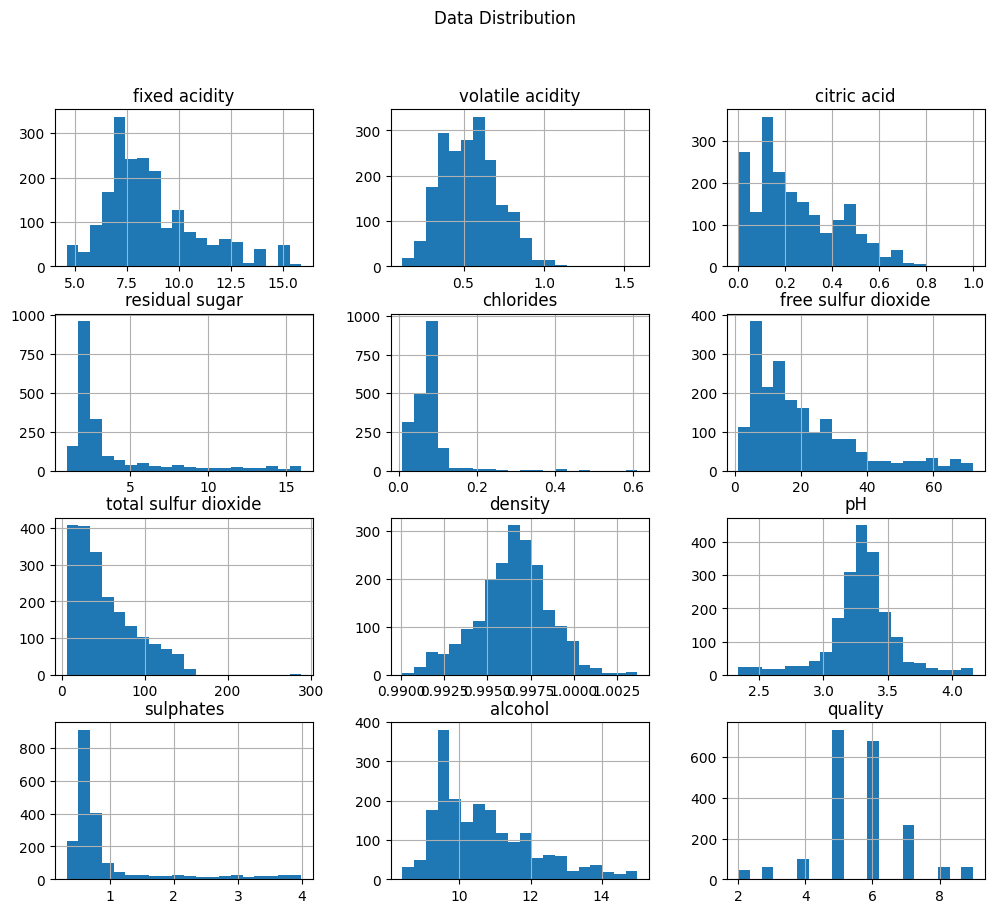

In [6]:
# Visualize the distribution of data using histograms
data.hist(bins=20, figsize=(12, 10))
plt.suptitle('Data Distribution')
plt.show()


### Step 7: Visualize Feature Correlations with a Heatmap
Heatmap will helps in understanding the correlation between different features

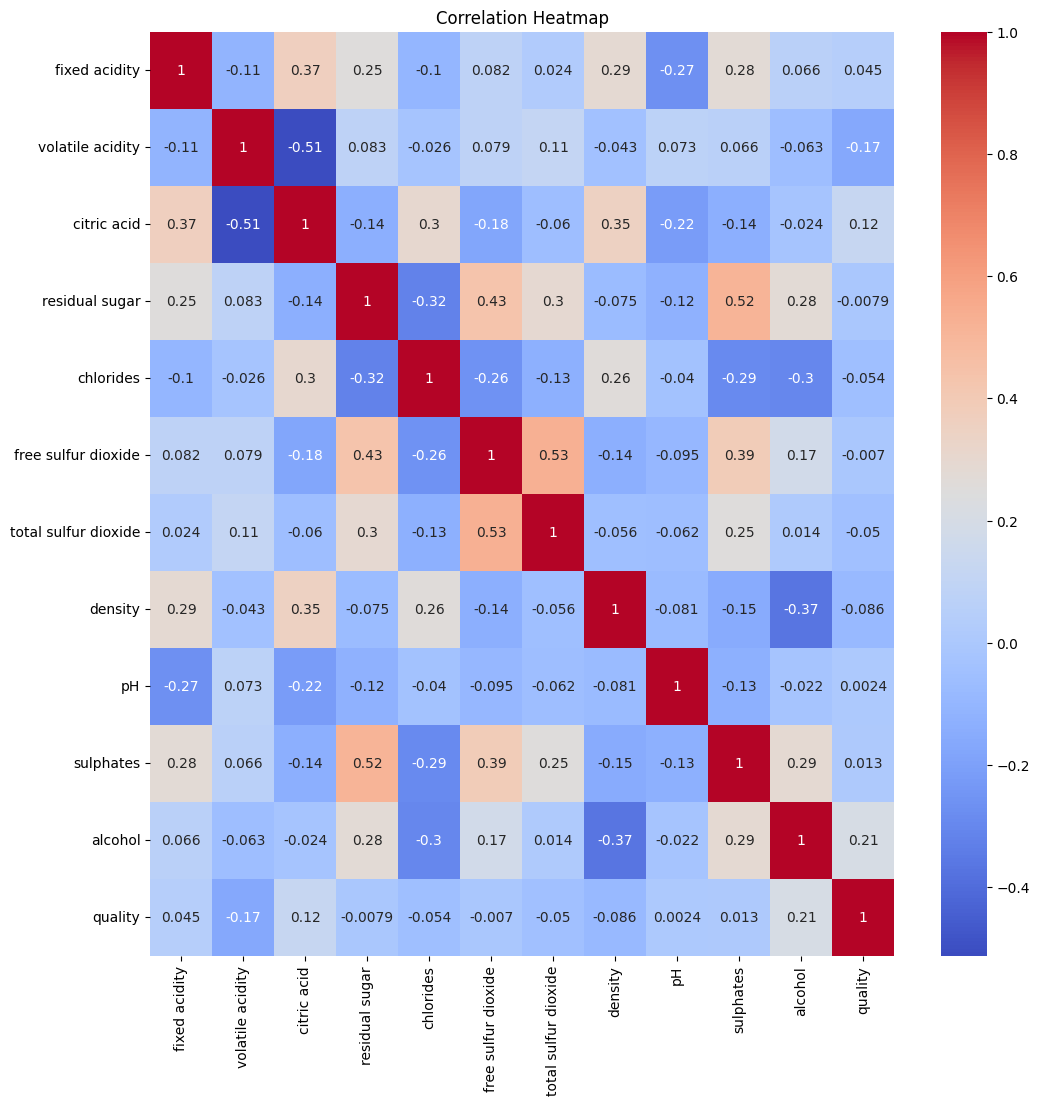

In [7]:
# Draw a heatmap to show correlations
import seaborn as sn
plt.figure(figsize=(12, 12))
sn.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


### Step 8: Select Features for the Model
We will use the following features for prediction: 'fixed acidity', 'volatile acidity', 'citric acid', 'alcohol', 'residual sugar', 'pH'.

In [8]:
# select features and target variable
features_selected = ['fixed acidity', 'volatile acidity', 'citric acid', 'alcohol', 'residual sugar', 'pH']
X = data[features_selected].values
y = data['quality'].values

### Step 9: Split the dataset into Training and Testing sets

We will split the data into 80% training and 20% testing

In [9]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# display the shapes of the training and testing
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {y_test.shape}")

Training set size: (1599, 6)
Testing set size: (400,)


### Step 10: Train linear regression model (we use fit() method)
Fit the model using the training set.

In [10]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Step 11: Make predictions on the test sets
we use trained model to make prections using "predict()"

In [11]:
y_pred = model.predict(X_test)
y_pred

array([5.63431504, 5.19873933, 5.30793164, 5.63072497, 5.52033351,
       5.52782858, 5.89718922, 5.59773102, 5.43078981, 5.78652345,
       5.70519493, 5.20791345, 5.57123969, 5.56455395, 5.57659211,
       5.53123486, 5.71650657, 5.56796196, 5.33779867, 5.31530258,
       5.63373094, 5.6131931 , 5.37441142, 5.32662409, 5.54676458,
       5.33803846, 6.09209975, 5.33078197, 5.6494819 , 5.31709463,
       5.47319962, 5.24062192, 6.00164014, 5.39314728, 5.7851966 ,
       5.58238372, 5.4200087 , 5.52033351, 5.3559266 , 5.50160332,
       5.47002751, 4.98975433, 6.0453148 , 5.8281061 , 6.06033881,
       5.37798289, 5.67881538, 6.00531739, 5.30988215, 5.74838253,
       5.37249625, 5.7948893 , 5.34138274, 6.15897489, 5.98572267,
       5.43115387, 5.65771875, 5.7455318 , 6.02498232, 5.47927308,
       5.70361993, 6.18278441, 6.11804839, 5.62756018, 5.22648593,
       5.35633681, 5.38967739, 5.55102196, 5.36941257, 5.67864569,
       5.76420245, 5.19551228, 5.30098611, 6.30109634, 5.11488

### Step 12: Evaluate the Model
Calculate the model's performance using metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² score.

In [12]:
# evaluate the model 
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('\nModel Evaluation:')
print(f'Mean Squared Error:{mse:.2f}')
print(f'root mean squared error:{rmse:.2f}')
print(f'R2 score:{r2:.2f}')


Model Evaluation:
Mean Squared Error:1.37
root mean squared error:1.17
R2 score:0.09


### Step 13: Visualize Actual vs Predicted Values
A scatter plot to visualize the model's predictions against the actual values.

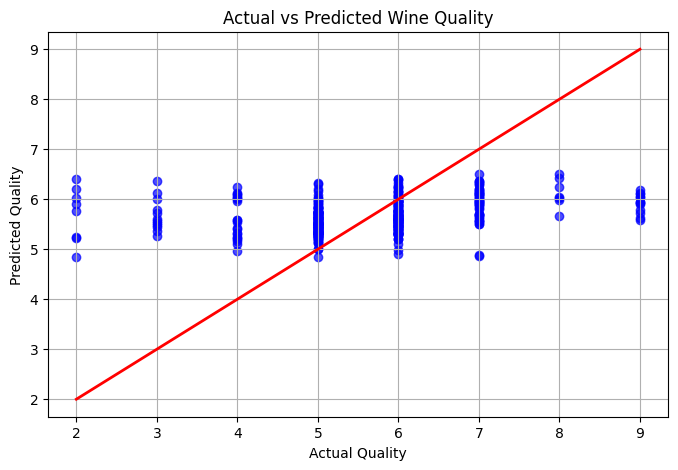

In [13]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Wine Quality')
plt.grid(True)
plt.show()

## Now let's compare linear regression with desicion tree, random forest, logistics 

### 1. Train and Evaluate Logistic Regression Model

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# train the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# predictions
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate its performance
# Evaluate the Logistic Regression model
accuracy = accuracy_score(y_test, y_pred_logistic)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

# Display the classification report and confusion matrix
# print("\nClassification Report:\n", classification_report(y_test, y_pred_logistic))

Logistic Regression Accuracy: 0.47


c:\Users\thinkBIG\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 2. Train and Evaluate Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Initialize and train the decision tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_model.predict(X_test)

# Evaluate performance
print("\nDecision Tree Model:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_tree))


Decision Tree Model:
Accuracy: 0.49
Classification Report:
              precision    recall  f1-score   support

           2       0.22      0.25      0.24         8
           3       0.00      0.00      0.00        12
           4       0.13      0.14      0.14        21
           5       0.64      0.61      0.62       151
           6       0.55      0.49      0.52       139
           7       0.45      0.59      0.51        49
           8       0.05      0.14      0.08         7
           9       0.00      0.00      0.00        13

    accuracy                           0.49       400
   macro avg       0.26      0.28      0.26       400
weighted avg       0.50      0.49      0.49       400



### 3. Train and Evaluate Random Forest Model

In [16]:
from sklearn.ensemble import RandomForestClassifier
# Initialize and train the random forest model
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

# Make predictions
y_pred_forest = forest_model.predict(X_test)

# Evaluate performance
print("\nRandom Forest Model:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_forest):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_forest))


Random Forest Model:
Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         8
           3       0.10      0.08      0.09        12
           4       0.25      0.05      0.08        21
           5       0.62      0.72      0.67       151
           6       0.56      0.62      0.59       139
           7       0.54      0.41      0.47        49
           8       0.10      0.14      0.12         7
           9       0.38      0.23      0.29        13

    accuracy                           0.55       400
   macro avg       0.32      0.28      0.29       400
weighted avg       0.53      0.55      0.53       400



### Let's save best model (random forest)

In [17]:
import pickle
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(forest_model, file)

## Conclusion

The Random Forest model is the best choice for predicting wine quality because it uses multiple decision trees to capture complex patterns and reduce overfitting. Unlike Linear Regression, which only works well with linear relationships, and Logistic Regression, which is limited to classification, Random Forest handles both regression (predicting quality scores) and classification (categorizing wine as "good" or "bad"). Its high accuracy and strong ability to generalize to new data make it the most effective and versatile option for this task.